***
<h1><center>ML Research Project (Final Report) </center></h1>
***
<h2><center>Project Name: Breast Cancer  Anomalies Detection using Machine Learning</center></h2>
***
<h4><center>Gia R. Nathan</h4><center> Union City, California<center> Gia R. Nathan <br>e-mail: <gianathan2024@gmail.com></center>

**Overview**: In this practical application, my goal is to compare  the performance of the machine learning based classifiers namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines in detecting cell anomalies in breast tissue from biopsy samples obtained from Fine Needle Aspirate method.  

I utilized Diagnostic Wisconsin Breast Cancer Database datasets with fine needle aspiration (FNA) records collected by UW-Madison to implement an anomaly detection model.  

The datasets were made publicly available by UW–Madison and are hosted on the UC Irvine Machine Learning Repository:__[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip)__. 

A biopsy is a medical diagnostic procedure to remove a piece of tissue or a sample of cells from a patient's body so that it can be tested in a laboratory. A fine needle aspiration (FNA) is a type of biopsy during which, a small amount of breast tissue or fluid is removed from a suspicious area and checked for cancer cells. A very thin needle and syringe to remove a sample of cells, tissue or fluid from an abnormal area or lump in the body. The sample is then examined under a microscope. FNA is also called fine needle aspiration biopsy, or fine needle biopsy. 

The UW-Madison dataset contains 569 distinct records with 33 columns representing features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. This FNA data can be used for developing a model for detecting malignant breast cancer cells in a patient's FNA biopsy sample.


> The basic idea is to develop a classifier that takes in fine needle aspirate data and classifies it with a positive label (in case it’s an “anomaly”) assigns the numeric value of +1 (one), and a negative label (“for normal updates ”) assigns the numeric value of -1 (minus one) for a benign cell sample.  In a real application the embedded classifier module is called by a diagnostic application on a medical device such as a laboratory analysis machine which prints out details of the FNA test results when it gets a anomaly detected message from the classifier. 

<img src="image/FNAAD.png" alt=" FNA Anomaly Detection Application" title="Title text" />


## Step 1: Processing and Understanding the Data 

 Tumor characteristics of the cell nuclei of a fine needle aspirate of a breast mass contains multiple real-valued features computed for each cell nucleus. Some of them are as follows:

    1. radius (mean of distances from center to points on the perimeter)
    2. texture (standard deviation of gray-scale values)
    3. perimeter
    4. area
    5. smoothness (local variation in radius lengths)
    6. compactness (perimeter^2 / area - 1.0)
    7. concavity (severity of concave portions of the contour)
    8. concave points (number of concave portions of the contour)
    9. symmetry
    10. fractal dimension ("coastline approximation" - 1)
. Labels for anomalies are added based on the periods when data were collected.  We are primarily interested in the 37 features from the BGP update messages. FNA biopsy samples of benign (left) and malignant (center and right) breast tumor cells will look like so: 

<img src="image/FNA.png" alt=" FNA images of normal (left) vs. malignant (right & center) breast tissue" title="Title text" />

### Data Acquisition

In [1]:
import pandas as pd
import numpy as np # linear algebra

import time
import missingno as msno #missing values in dataset
# data visualization libraries 
import seaborn as sns 

import matplotlib.pyplot as plt

In [2]:
# Using the pandas library to load the dataset

In [3]:
import time
from subprocess import check_output
print(check_output(["dir", "./input"]).decode("utf8"))
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

data.csv



In [4]:
#Read data directly from the url
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
#column_names = ["id", "diagnosis"] + [f"feature_{i}" for i in range(30)]
#data = pd.read_csv(url, header=None, names=column_names)



#### Loading the Dataset and forming a Pandas Dataframe

In [5]:
data = pd.read_csv('./input/data.csv')

In [6]:
# Rows and Columns in the dataset

data.shape

(569, 33)

In [7]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Data Visualization

In [8]:
#Display the information about the dataset

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# Display the first five rows

data.head()  

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In real world datasets we often come across missing data.  A good machine learning model depends on complete dataset. These missing values as represented as NaN (Not a Number) values in the dataset.We can use some data imputation techniques to replace the NaN values with some probable values, so we need to have a good understanding of how the NaN values are distributed in our dataset off which we want to build the ML model.

    MSNO is a python library that allows you to visualize a pandas dataframe to visually look for missing values. I used the MSNO library below to look for missing values.  


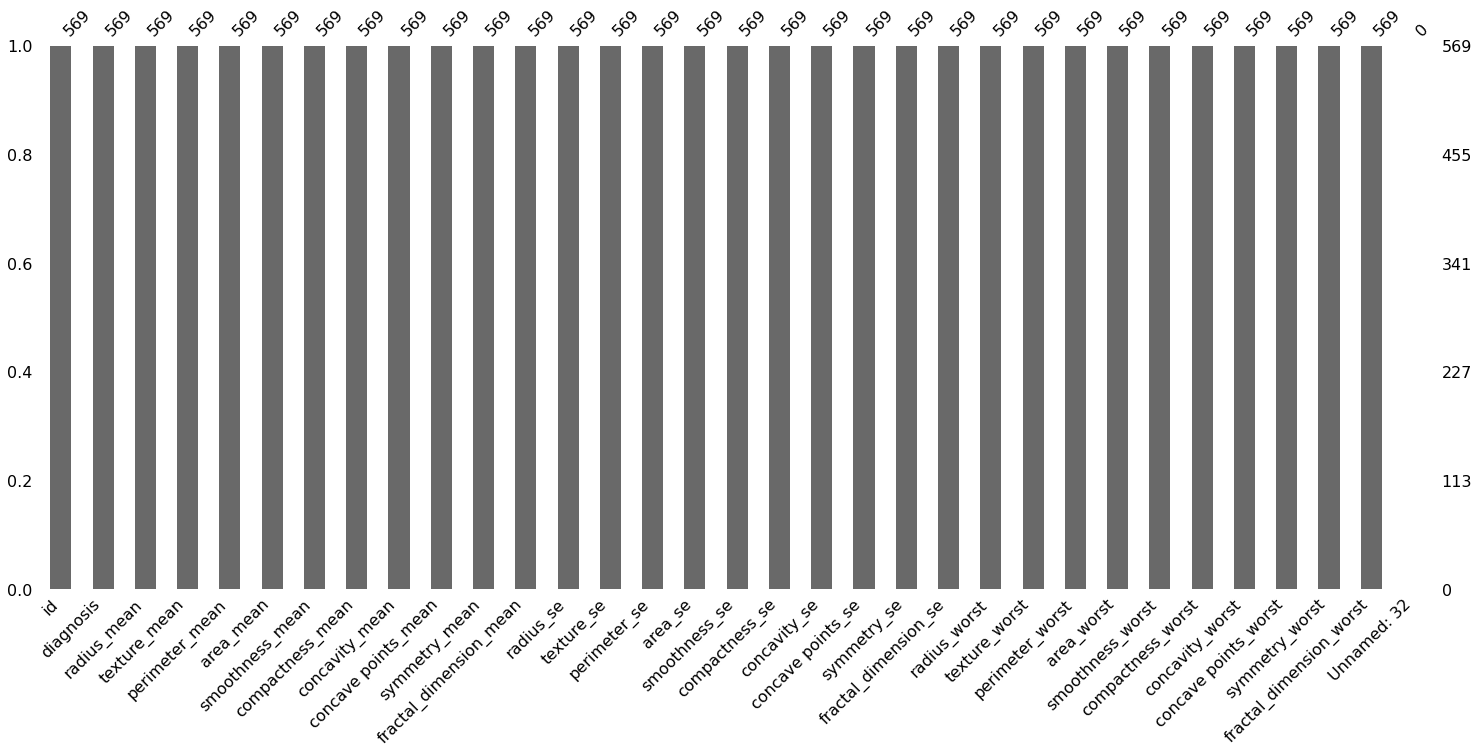

In [10]:
msno.bar(data)
plt.savefig('./image/msno')
plt.show()

In [11]:
# feature names as a list
# .columns gives columns names in data 
col = data.columns       
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


We can observe the following: 

1. id field which is not very useful for classification
2. diagnosis field which is the class label for classifying the tumor as benign or malignant
3. Unnamed: 32 which is not very useful either and contains a number of 'NaN' values

We can right away discard the id and unanamed columns from  a cursory glance. We need to look further into the dataset

In [12]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Quick glimpse of tumor features in relation to diagnosis
data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


#### Visualizing the class imbalance 

Number of Benign:  357
Number of Malignant :  212


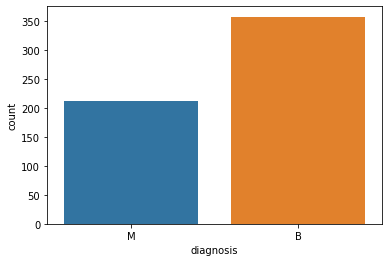

In [14]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

#### Generate Summary Statistics on the various feature columns

In [15]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
# For differential diagnosis visual comparisons.
# create a couple of dataframes - one for positive, one for negative

data_n = data[data['diagnosis'] == 'B']
data_y = data[data['diagnosis'] == 'M']

# Create list of features related to mean tumor characteristics
features_means =data.columns[0:10]

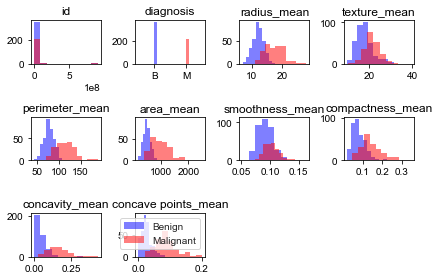

In [17]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(data.columns[0:10]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   



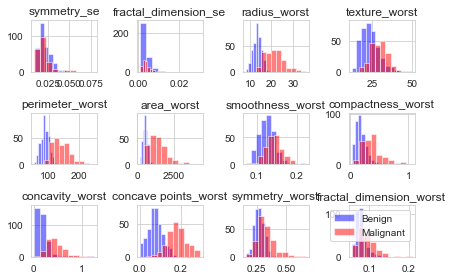

In [18]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(data.columns[20:-1]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

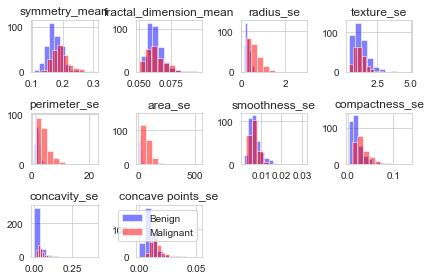

In [19]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(data.columns[10:20]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

It looks like mean radius, perimeter, compactness concave points and concavity most clearly segregate between diagnosis. From a descriptive statistics perspective, this could be further evaluated using Anova with a post-hoc test.

## Visualization of the features

We can use violin and swarm plots.Violin plots are used when to observe the distribution of numeric data, 
to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group's density curve can be compared to see where groups are similar or different.
However normalization is needed before we can use the seaborn package as the
differences between values of features are very high to visualiaze on the plot. 
Features are put into 3 groups, with each group containing 10 features for better visualization.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

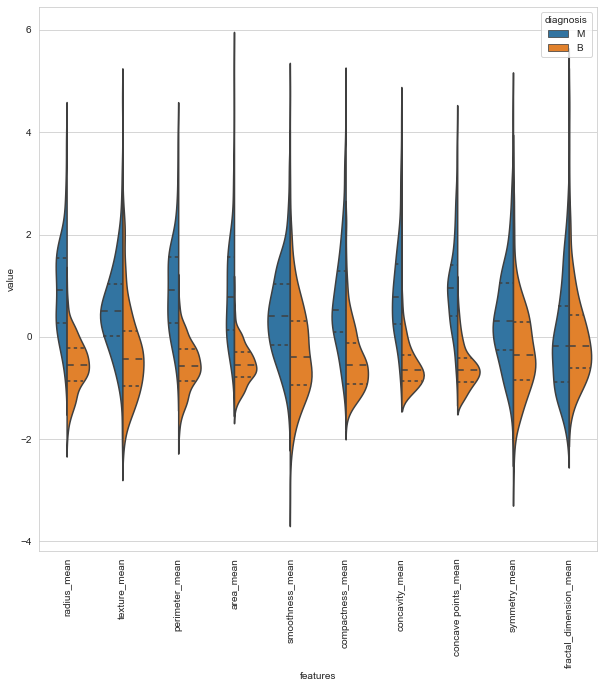

In [20]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From the plot above we can see that the texture_mean feature, median of the malignant vs. benign has clear separation, so this feature can be used for classification. When we look at the fractal_dimension_mean feature, the median of the malignant vs benign does not looks bunched together, so may not provide good information for classification. Now let's look at the next ten features


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

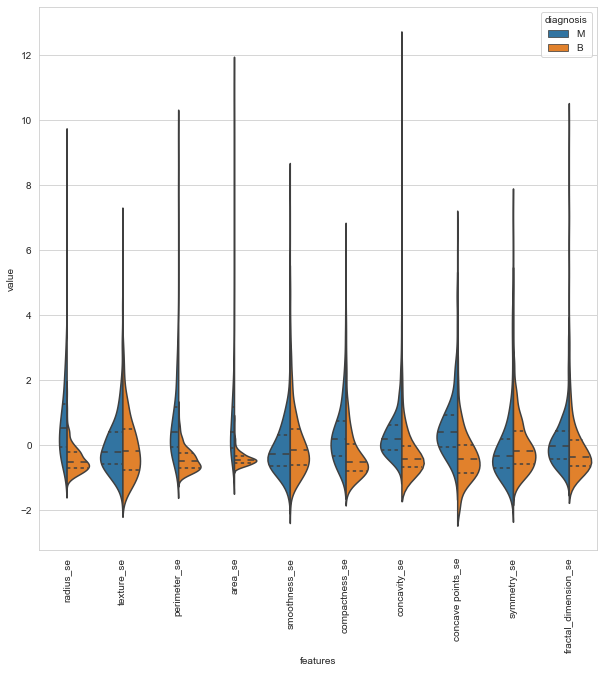

In [21]:
# Next Ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

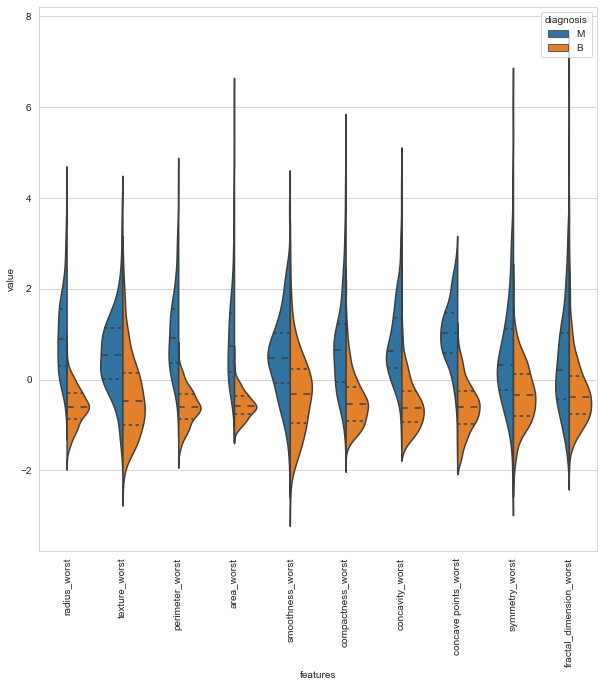

In [22]:
# Last set of features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

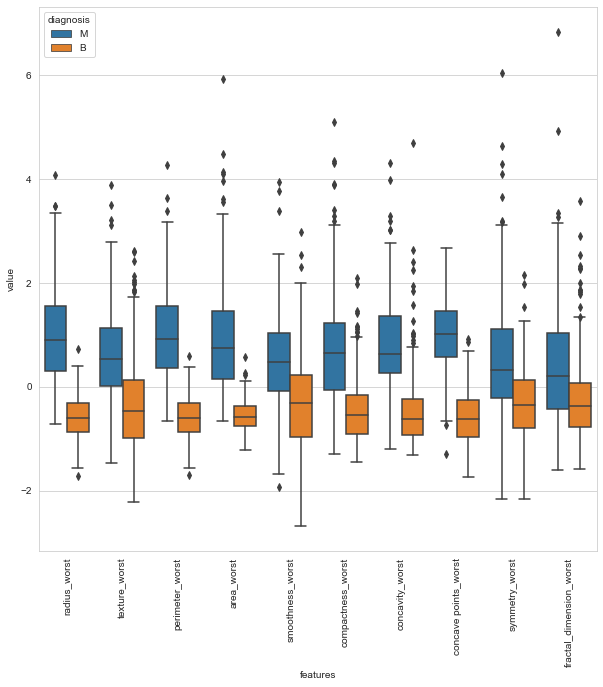

In [23]:
# A box plot is used to visualize the outliers
# Some features are visualized for clarity
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

From the  plot above, we can see that the variables concavity_worst and concave point_worst looks like similar. We need to find out whether they are correlated with each other. The basic idea is that if the features are correlated with each other we can drop one of them for faster model building. 

A joint plot is used for further analysis. A joint plot is a way of understanding the relationship between two variables and the distribution of individuals of each variable. The joint plot mainly consists of three separate plots in which, one of it was the middle figure that is used to see the relationship between x and y.This is done to get  a cursory idea which will be handy during feature selection.

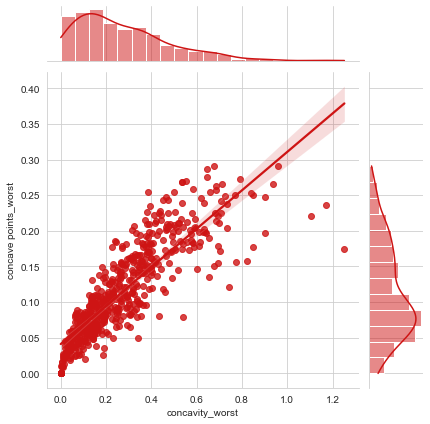

In [24]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

From the joint plot above, we can see that the features are truly correlated. Pearsonr value is correlation value and 1 
being the highest. We can also infer from the value of 0.86 that two feature are correlated. 


Next we want to compare three or more feauture comparision at time. Using PairGrid, we can form a quick and high-level summary of interesting relationships in our cancer dataframe. For this purpose we can use pair grid plot.

In PairGrid, each row and column is assigned to a different variable, so the resulting plot shows each pairwise relationship in the cancer dataset. We can see that radius_worst, perimeter_worst and area_worst are correlated as it can be seen pair grid plot. We can use this during feature selection

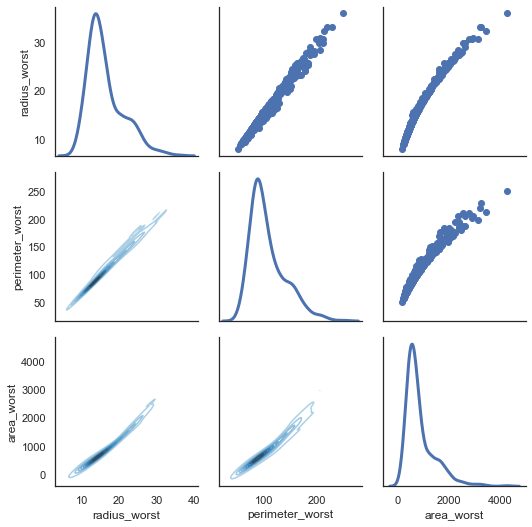

In [25]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

A swarm plot is a good complement to a box or violin plot in cases where we want to show all observations along with some representation of the underlying distribution. We can do the same with our dataset to see variance more clearly.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

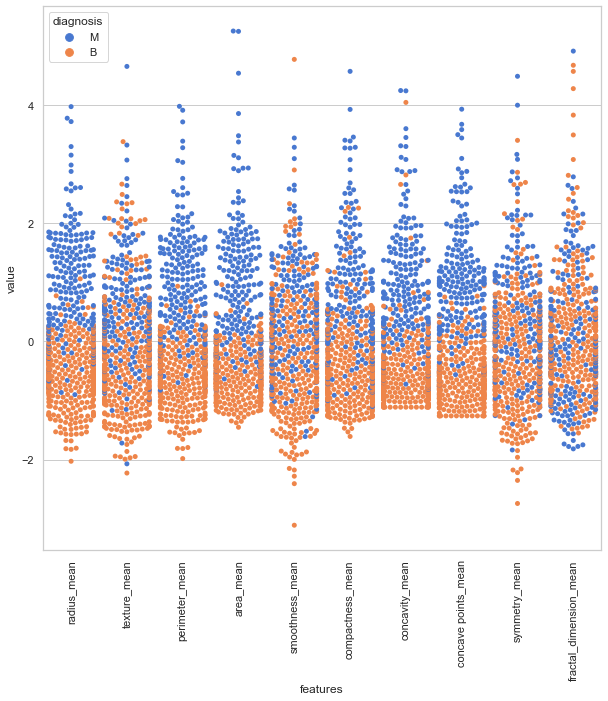

In [26]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

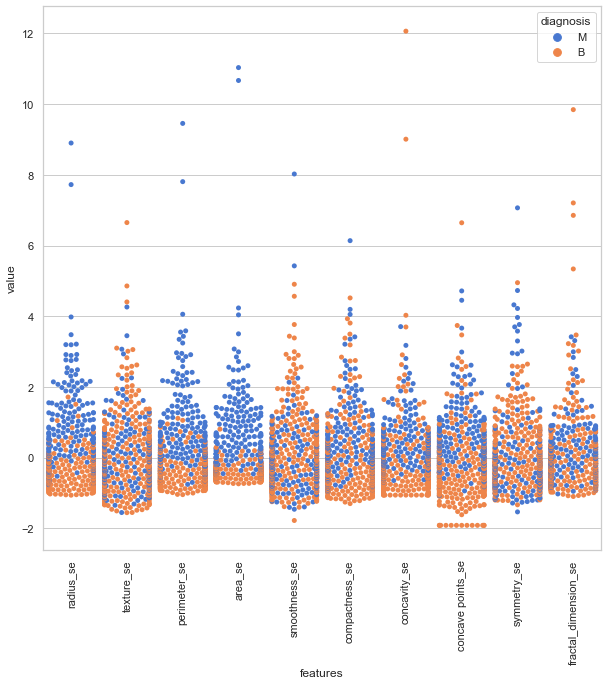

In [27]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

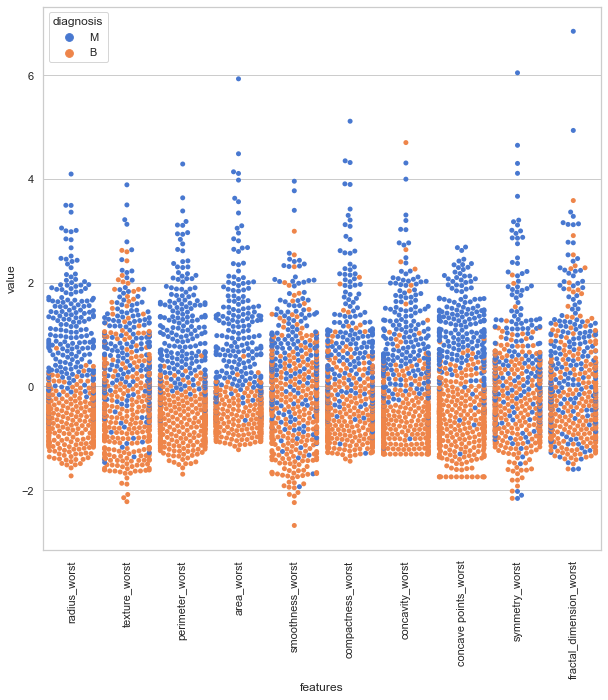

In [28]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

From the plots we can visualize the features that are more clear for classification. area_worst in last swarm plot looks like malignant and benign labels are mostly seperated out.  With smoothness_se in swarm plot 2 it looks like malignant and benign are mixed so it is hard to classify while using this feature.

So next we can observe the correlation between features using a heatmap.

<AxesSubplot:>

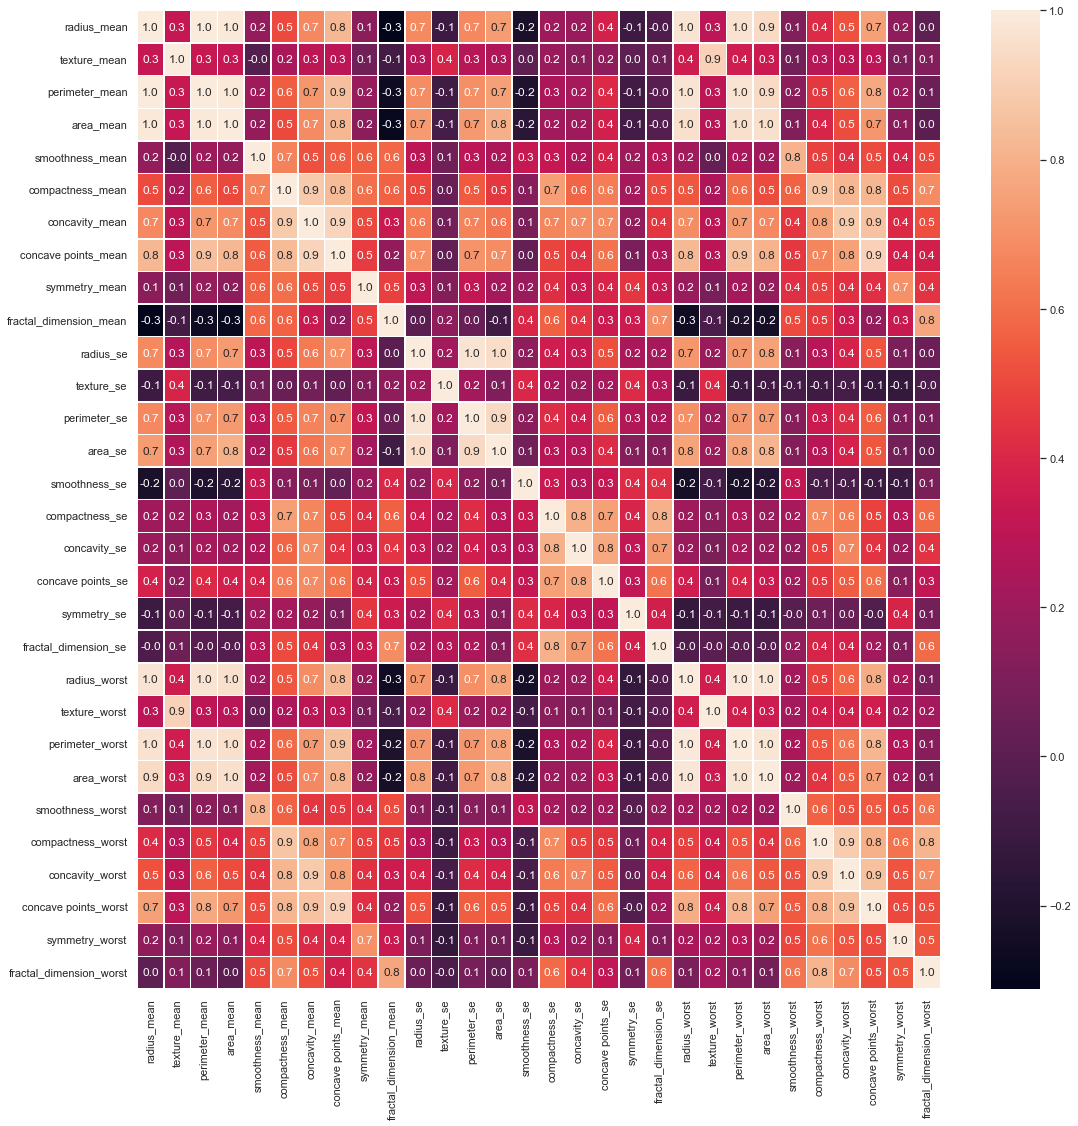

In [29]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Data Preprocessing

In [30]:
# Drop the 'id' column as it sems to be an identifier

In [31]:
#data = data.drop('id', axis=1)
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<AxesSubplot:>

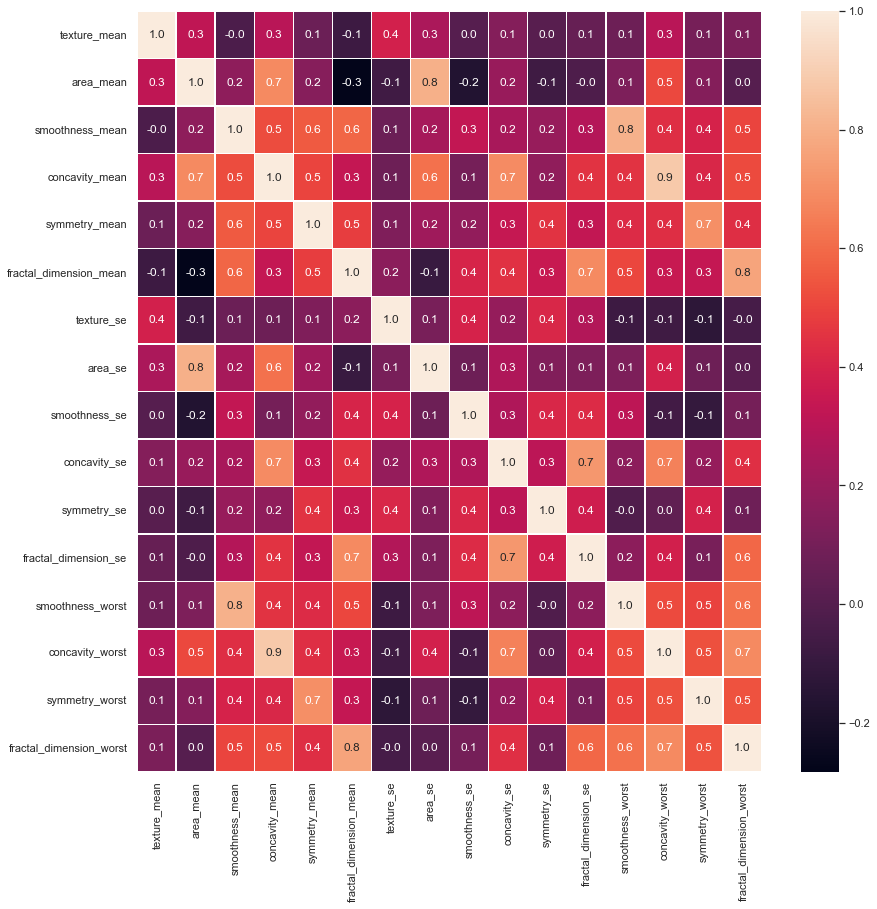

In [32]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Step 2: Feature Selection

#### Some Observations on the features from the heat map

1. Based on the heat map we can see that radius_mean, perimeter_mean and area_mean are correlated with each other. 
   This means we can use one of them, so I picked area_mean based on the swarm plots. 
2. Next step was in finding other correlated features and computing accuracy with random forest classifier.

 -  Compactness_mean, concavity_mean and concave points_mean are correlated with each other, I picked concavity_mean.
 -  Similarly radius_se, perimeter_se and area_se are correlated,I picked area_se. 
 -  radius_worst, perimeter_worst and area_worst are correlated, I picked area_worst.
 -  Compactness_worst, concavity_worst and concave points_worst, I use concavity_worst. 
 -  Compactness_se, concavity_se and concave points_se, I picked concavity_se. 
 -  texture_mean and texture_worst are correlated, I picked texture_mean. 
 -  area_worst and area_mean are correlated, I picked area_mean.


Accuracy is:  0.9649122807017544


<AxesSubplot:>

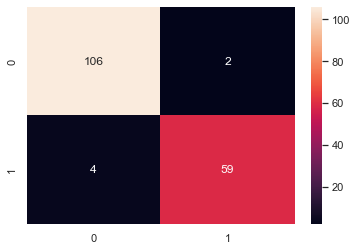

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [35]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9532163742690059


<AxesSubplot:>

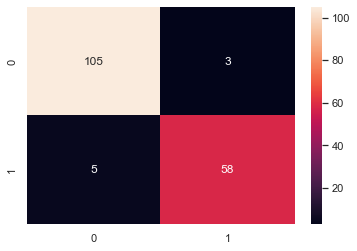

In [36]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [37]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [38]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


In [39]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [40]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


In [41]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


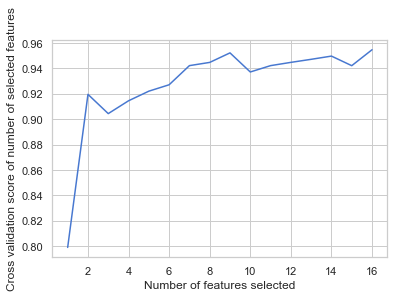

In [42]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Feature ranking with Recursive Feature Elimination. (RFE)

-  It is a feature selection technique using a classification algorithm (Random Forest)
-  RFE assigns weights to each of features. Features with smallest absolute weights are pruned.
-  This step is repeated (recursively on each pruned set, hence the name RFE) until desired number of features are derived
-  Five features are selected using the RFE method

##### Reference: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 

Feature ranking:
1. feature 3 (0.227833)
2. feature 1 (0.180058)
3. feature 7 (0.162700)
4. feature 13 (0.159650)
5. feature 14 (0.039677)
6. feature 0 (0.037589)
7. feature 12 (0.031553)
8. feature 9 (0.030527)
9. feature 2 (0.027676)
10. feature 5 (0.019958)
11. feature 15 (0.017388)
12. feature 11 (0.015453)
13. feature 10 (0.014904)
14. feature 4 (0.014470)
15. feature 6 (0.010501)
16. feature 8 (0.010063)


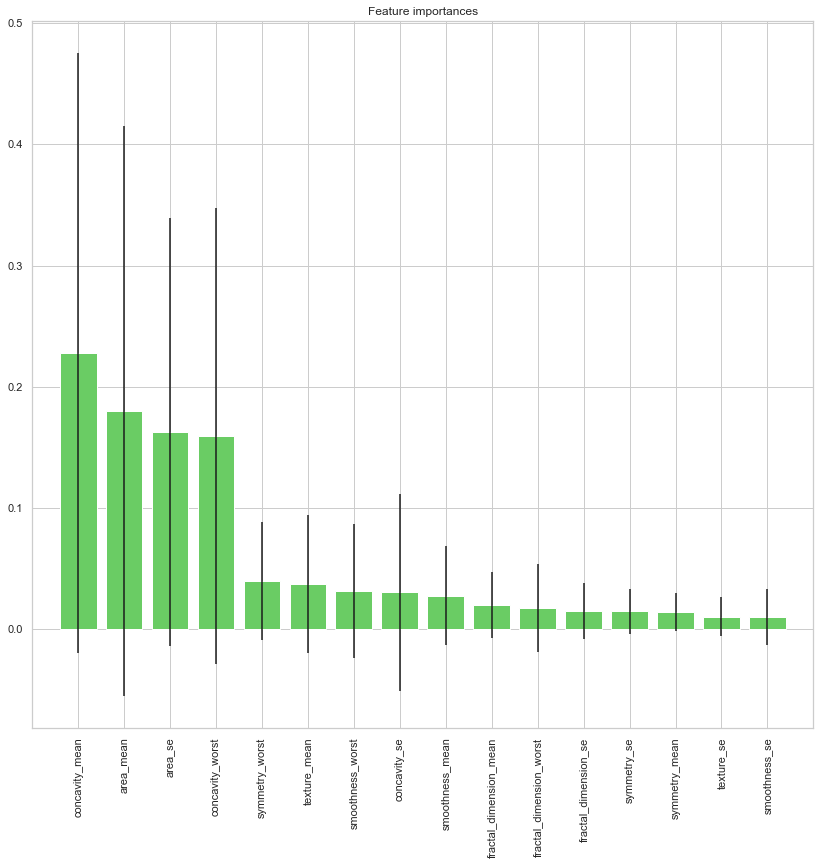

In [43]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Text(0, 0.5, 'explained_variance_ratio_')

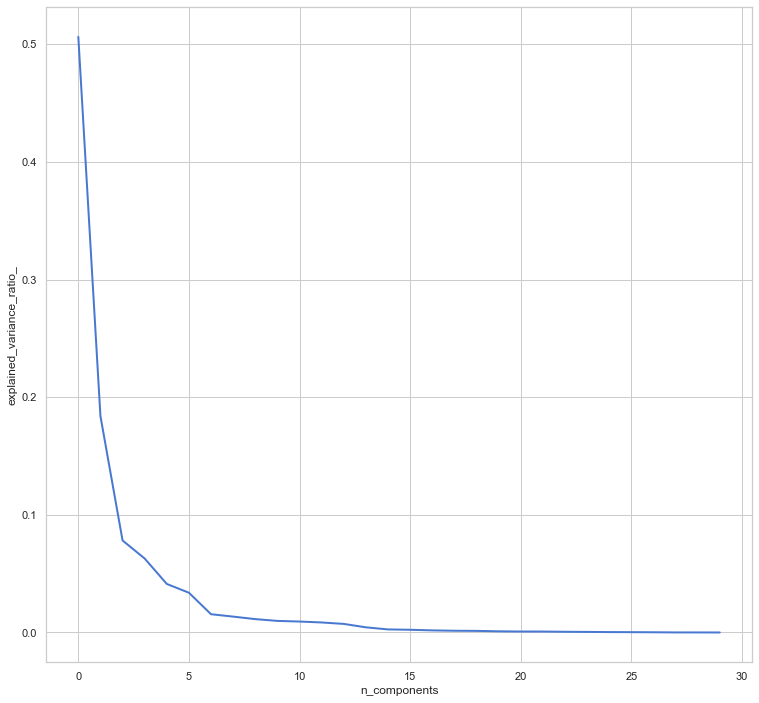

In [44]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [45]:
# Mapping the 'diagnosis' column to binary values:

In [46]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [47]:
# Split the dataset into train and test sets using sklearn's split function

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
 
#X = data.drop('diagnosis', axis=1)
 
#y = data['diagnosis']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Step 3: Model Training & Evaluation

**Model Testing**

    I tested a variety of algorithms using scikit-learns's libraries. The models included both parametric (e.g. SVM) and non-parametric (e.g. KNN) and linear (e.g. Logistic Regression) and nonlinear models (e.g. Random Forest Classifier).



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#####  Compare performance of well known algorithms:

##### * Logistic Regression
##### * Decision Tree Classifier
##### * Random Forest Classifier 
##### * Support Vector Machines (SVM)
##### * k-Nearest Neighbors (kNN)

In [51]:

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "kNN": KNeighborsClassifier()
}

# Train and evaluate
results = {}

#output the accuracy for each algorithm

for name, model in models.items():
    #model.fit(X_train, y_train)
    model.fit(x_train_2, y_train)
    predictions = model.predict(x_test_2)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

print('The model performance for various algorithms are: ', results)


The model performance for various algorithms are:  {'Logistic Regression': 0.9590643274853801, 'Decision Tree': 0.9181286549707602, 'Random Forest': 0.9532163742690059, 'SVM': 0.8888888888888888, 'kNN': 0.9064327485380117}


### Compare & Choose Best Model

In [52]:
best_model_name = max(results, key=results.get)

print(f"Best performing model is: {best_model_name} with an accuracy of {results[best_model_name]}")


Best performing model is: Logistic Regression with an accuracy of 0.9590643274853801


In [53]:
best_model=LogisticRegression(max_iter=10000)
best_model.fit(x_train_2, y_train)

LogisticRegression(max_iter=10000)

## Step 4: Optimizing the Logistic Regression using GridSearch 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import set_config

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

In [56]:
set_config(display="diagram")

In [57]:
data = pd.read_csv('./input/data.csv')

In [58]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
# feature names as a list
# .columns gives columns names in data 
col = x.columns       
print(col)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [60]:
#data = data.drop('id', axis=1)
drop_list2 = ['radius_mean', 'perimeter_mean',
       'compactness_mean', 
       'concave points_mean',
       'radius_se','perimeter_se',
       'compactness_se', 'concave points_se',
        'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst',
       'compactness_worst', 'concave points_worst']
x_2 = x.drop(drop_list2,axis = 1 )        # do not modify x, we will use it later 
x_2.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [61]:
X=x_2
col = X.columns       
print(col)

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [62]:


# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Machine learning models can learn the training data too well and lose the ability to generalize. In other words become ineffective against new unseen data. This phenomena is called overfitting. Regularization is particularly useful when dealing with limited data, high-dimensional datasets, or models with many parameters (like in this case).

##### Regularization:

Regularization is a technique used in machine learning to prevent overfitting and to improve the generalization ability of models.  Regularization introduces additional constraints or penalties to the model during the training process,  to control the complexity of the model by avoiding over-reliance on specific features or patterns in the training data. Regularization helps to strike a balance between fitting the training data well and generalizing it well to new unseen data.

The most common regularization techniques used are L1 regularization (Lasso), L2 regularization (Ridge), and Elastic Net regularization. L1 regularization adds the sum of the absolute values of the model’s coefficients to the loss function, encouraging sparsity and feature selection. L2 regularization adds the sum of the squared values of the model’s coefficients, which enables smaller but non-zero coefficients. Finally, elastic Net regularization combines both L1 and L2 regularization.

In scikit-learn's LogisticRegression library the regularization is set by setting the following values (C: float, default=1.0 and Penalty parameter l1, l2 etc.   As per the documentation the actual equation is like so:


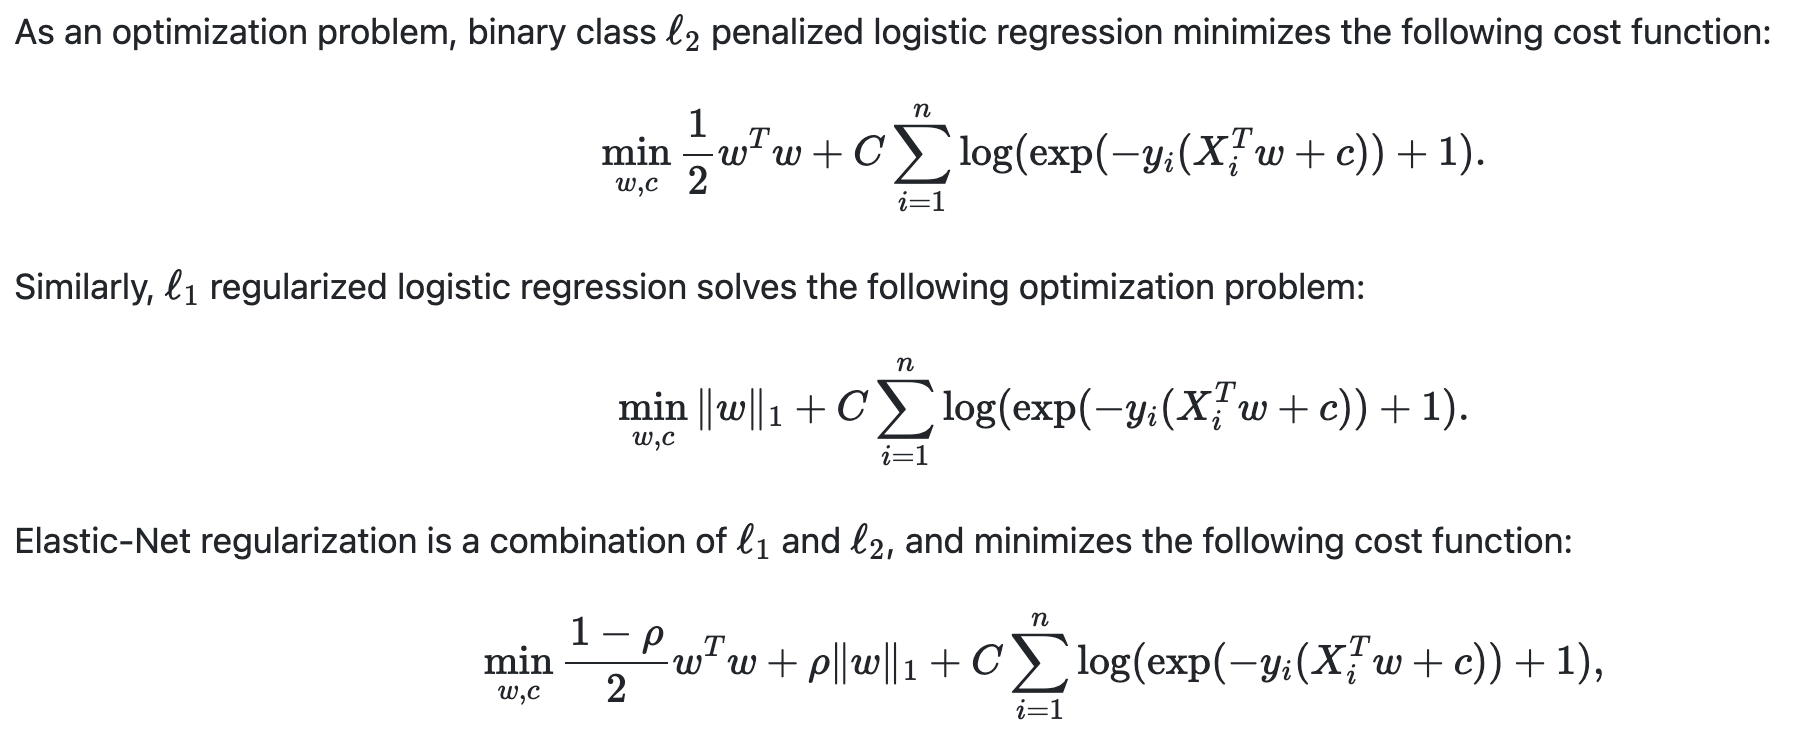
 
 The first term is the regularization term (with 3 variants: l1, l2, and a mix of both), and the second term is the log loss. Importantly, note that the hyperparameter C multiplies the second term, not the regularization loss. But of course, minimizing the sum reg + C*log_loss is equivalent to minimizing the loss 1/C*reg + log_loss. So C is literally the inverse of the regularization strength.
 
 We have to figure our whether to use l1 or l2 penalty or the value of C the inverse of regularization strength.

In machine learning these parameters are called hyperparameter or a parameter whose value is used to control the learning process.  Performing this manually and training the models is a slow process So the next step is to figure out the best parameters and  tune the parameters to derive the best performing model using an inbuilt function in sklearn library. 


In [63]:
# Define hyperparameters to tune
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

#### GridSearchCV:

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters. The function is included in the library and I used this like so: 

In [64]:
# Define logistic regression model
logmodel = LogisticRegression()

# Define GridSearchCV object
grid_search = GridSearchCV(logmodel, hyperparameters, cv=5)


In [65]:
# Fit model
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('The best parameters after running the Gridsearch are: ', grid_search.best_params_)



The best parameters after running the Gridsearch are:  {'C': 100, 'penalty': 'l2'}


In [66]:
# Print best score
print('The best score from Grid Search is: ', grid_search.best_score_)


The best score from Grid Search is:  0.9396202531645569


In [67]:
 

# Use best model for prediction
logmodel = grid_search.best_estimator_
y_pred = logmodel.predict(X_train)

# Evaluate performance of best model
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)


0.949748743718593


#### ML Pipeline Setup
I set up the pipeline using sklearn to visually demonstrate how the data is processed to generate the model.The sklearn.pipeline module implements utilities to build a composite estimator, as a chain of transforms and estimators.

In [68]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)


preprocessor = ColumnTransformer(
    [
                ("numerical", numeric_preprocessor, ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst']),
    ]
)

clf = make_pipeline(preprocessor, LogisticRegression(C=100.0,penalty='l2', max_iter=500))


#Display the machine learning pipeline 
clf



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['texture_mean', 'area_mean',
                                                   'smoothness_mean',
                                                   'concavity_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'texture_se', 'area_se',
                                                   'smoothness_se',
                                                   'concavity_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'smoothness_worst',
                                                   'concavity_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('logisticregression',
                 LogisticRegression(C=100.0, max_iter=500))])

In [69]:
clf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['texture_mean', 'area_mean',
                                                   'smoothness_mean',
                                                   'concavity_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'texture_se', 'area_se',
                                                   'smoothness_se',
                                                   'concavity_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'smoothness_worst',
                                                   'concavity_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('logisticregression',
                 LogisticRegression(C=100.0, max_iter=500))])

In [70]:
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Model Accuracy is:", accuracy)

Model Accuracy is: 0.9766081871345029


## Step 5: Score the Model

What is the accuracy of our model?

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    True Positive Rate
    False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
TPR = TP/(TP + FN)

False Positive Rate (FPR) is defined as follows:

FPR = (FP)/(FP + TN)
An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.  

### Generate the ROC curves from labels and predicted scores/probabilities

In [71]:
import scikitplot as skplt   # scikit plot module which generates plots for machine learning evaluation metrics

In [72]:

y_probas = clf.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

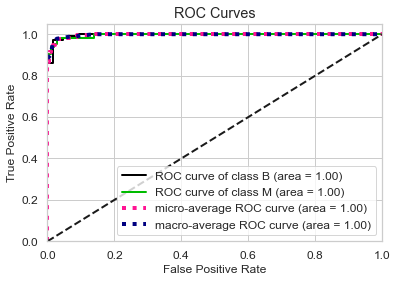

In [73]:

skplt.metrics.plot_roc(y_test, y_probas)


### Generate the KS Statistic plot from labels and scores/probabilities

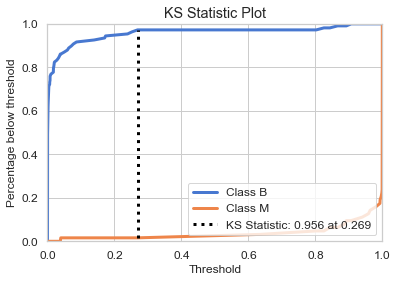

In [74]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

### Plot the Precision and Recall Curves

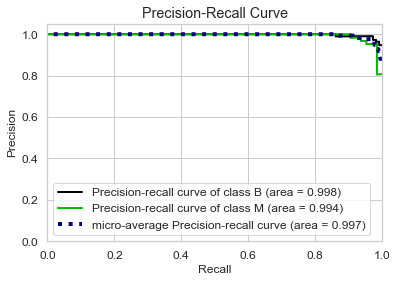

In [75]:

skplt.metrics.plot_precision_recall(y_test, y_probas)

plt.show()

In [76]:
### Generate the Lift Curve from labels and scores/probabilities

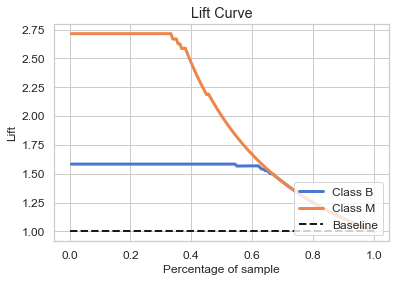

In [77]:
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

## Step 6: Prediction

**Now that we the best performing model we need to figure out a simple utility to do predictions using this model on test data.I wrote a simple function to generate prediction which uses the  best model to make the prediction.**

In [78]:
def predict_with_best_model(input_data):
    """
    Use the best model to make a prediction.
    
    Parameters:
    - input_data: A 2D array or DataFrame representing the features of the data point(s)
    
    Returns:
    - predictions: Predicted labels for the input data
    """
    predictions = clf.predict(input_data)
    return predictions


#### Usage of the prediction function. We can take the first 5 test samples from the dataset to do predictions for the sample data using the best performing model. 

#### Depending on the model, a result of  "M" indicates a malignant tumor and "B" a benign tumor.

In [79]:
X_test[:6]

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
204,18.60,481.9,0.09965,0.08005,0.1925,0.06373,1.0440,30.29,0.006953,0.02701,0.01782,0.003586,0.1426,0.2671,0.3014,0.08750
70,21.31,1130.0,0.09009,0.10800,0.1582,0.05461,0.7975,96.05,0.004444,0.02269,0.01386,0.001698,0.1193,0.2687,0.2551,0.06589
131,19.48,748.9,0.10920,0.14660,0.1931,0.05796,0.7859,48.31,0.006240,0.02813,0.01397,0.002461,0.1546,0.3791,0.2837,0.08019
431,17.68,467.8,0.10540,0.07741,0.1811,0.07102,1.4600,15.43,0.010000,0.04861,0.02187,0.006005,0.1450,0.2403,0.2556,0.09359
540,14.44,402.9,0.09984,0.06737,0.1818,0.06782,1.7680,20.86,0.012150,0.05553,0.01840,0.005512,0.1345,0.1797,0.2329,0.08134
567,29.33,1265.0,0.11780,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.1650,0.9387,0.4087,0.12400


In [80]:
sample_data = X_test[:6]  
predictions = predict_with_best_model(sample_data)

print(predictions)


['B' 'M' 'M' 'B' 'B' 'M']


### Result Summary:
>**We can see that the latest model based on GridSearchCV is pretty accurate. It got one prediction wrong which is in line with the accuracy rate on test data and ROC characterestics**

**Findings and Actionable Insights:**
> 1. The objective of this capstone project was to come up with an optimum classification model to predict whether a features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass can be classified as anomalous (M) or normal (B) based on the provided attributes.
2. I analyzed 33  numerical variables which capture the various attributed of a typical biopsy sample to build the model.
3. Exploratory data analysis showed no null values in the dataset, and the data is imbalanced, where “M” anomalous sample is the minority class.
4. Univariate analysis revealed that 'id' column as it sems to be an identifier does not help very much when it comes to predicting the target variable.  Similarly ['radius_mean', 'perimeter_mean',
       'compactness_mean', 
       'concave points_mean',
       'radius_se','perimeter_se',
       'compactness_se', 'concave points_se',
        'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst',
       'compactness_worst', 'concave points_worst']  do not seem to make much of a difference in the model performance. Some numerical features tend to predict the target variable much better (for example: ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean'] etc.)
5. Dataset preprocessing of numerical data was done using standscaler and MinMax scaler 
6. Basic models were built using K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.
7. The most important features in predicting whether a FNA sample is anomalous  based on the Logistic Regression model was  
['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst']
8. GridSearch was used to find the best parameters. 
9. The best model was generated using the GridSearch derived best parameters which were as follows: {'C': 100, 'penalty': 'l2'}.
10. Logistic Regression model gave the best performance  with  GridSearchCV and the Model Accuracy is: 0.9766 which was similar to the results reported by previous research reports.


### Future Study and steps for enhancing the Classifier Model: 

> 1. Fine Tuning the model based on domain knowledge and feature importance results
2. We could reduce the dimensions/features further to tune the model. We could use libraries like SMOTE(Synthetic Minority Over-sampling Technique) to remedy the class imbalance. Reference: https://arxiv.org/abs/1106.1813</li>
3. Logistic Regression Model training even with HalvingGridSearch was very slow. </li>
4.  There are some new libraries like T-POT https://epistasislab.github.io/tpot/using/ that use genetic algorithms for hyperparameter tuning to derive the best pipeline for this classification problem. For best feature selection we could use a library like YellowBrick  https://www.scikit-yb.org/en/latest/api/model_selection/importances.html
5. Ensemble models, XGBoost could be used as next step in improving the performance of the current Logistic Regression model
6. Neural Networks/Autoencoders and LSTM based model seems to be well suited for this class of problems. The dataset used was labeled, but this manual process is a tedious one. We can use NN to do unsupervised learning to put the labels.